# Encoder-Decoder Analysis
<

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing10_200_512_04drb/encdec_noing10_200_512_04drb.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing10_200_512_04drb/encdec_noing10_200_512_04drb_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Dropout(0.400000)
  (3): nn.LSTM(200 -> 512)
  (4): nn.Dropout(0.400000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 2.3673017565124)
('Valid Perplexity: ', 715.00768861138)
('Test Perplexity: ', 868.10803606793)


### Loss vs. Epoch

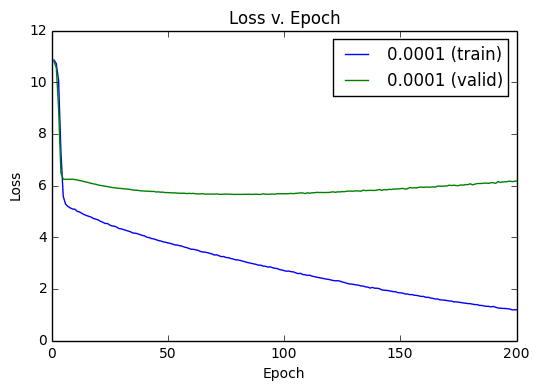

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

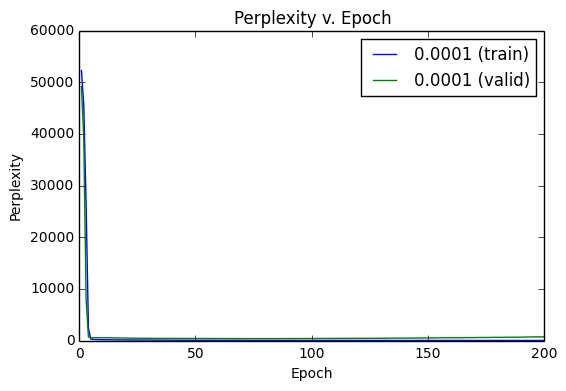

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample, best_bleu=None):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    if best_bleu is not None:
        cbm = ' '.join([w for w in best_bleu['best_match'].split(' ') if w != '<mask>'])
        print('Closest BLEU Match: ' + cbm + '\n')
        print('Closest BLEU Score: ' + str(best_bleu['best_score']) + '\n')
    print('\n')
    

In [6]:
for i, sample in enumerate(report['train_samples']):
    print_sample(sample, report['best_bleu_matches_train'][i] if 'best_bleu_matches_train' in report else None)

Input:  strawberry shortcakes

Gend:  <beg> combine the cornmeal , flour , sugar , baking powder , and salt , mixing well . <step> add the milk , and bread crumbs

True:  combine coconut , flour , salt . <step> add milk and vanilla . <step> i find it much easier to use <end>

Closest BLEU Match:  combine the cornmeal , flour , sugar , mustard , baking powder and salt , mixing well . <step> add the milk , egg <end>

Closest BLEU Score: 70.1611656261



Input:  5 - minute healthy strawberry frozen yogurt

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium heat . add the onion ,

True:  preheat oven to 350 <step> brown beef in skillet & add taco seasoning . cook as directed on seasoning packet <step> spray an <end>

Closest BLEU Match:  preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large pot over medium heat cook and stir <end>

Closest BLEU Score: 64.7285941823



Input:  curry chickpea salad

Gend:  <beg> preheat oven to 

In [7]:
for i, sample in enumerate(report['valid_samples']):
    print_sample(sample, report['best_bleu_matches_valid'][i] if 'best_bleu_matches_valid' in report else None)

Input:  <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2>

Gend:  <beg> 1 . heat oil in a large skillet over medium heat . add the onion , and cook over medium - low heat for 20

True:  for dipping sauce , the dipping sauce is supposed to be a little salty because you will be `` dipping '' the <end>

Closest BLEU Match:  heat oil in a large skillet over medium heat . add the onion , corn and soy beans , and cook <end>

Closest BLEU Score: 55.6126655011



Input:  <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2>

Gend:  <beg> 1 . heat oil in a large skillet over medium heat . add the onion , and cook over medium - low heat for 20

True:  preheat oven to 400 ? . <step> arrange prosciutto in a single layer on a baking sheet . bake at 400 ? <end>

Closest BLEU Match:  heat oil in a large skillet over medium heat . add the onion , corn and soy beans , and cook <end>

Closest BLEU Score: 55.6126655011



Input:  <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK

In [8]:
for i, sample in enumerate(report['test_samples']):
    print_sample(sample, report['best_bleu_matches_test'][i] if 'best_bleu_matches_test' in report else None)

Input:  tasty green bean casserole

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium heat . add the onion ,

True:  preheat the oven to 325 degrees f ( 165 degrees c ) . <step> fry bacon in a skillet over medium - high <end>

Closest BLEU Match:  preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large pot over medium heat cook and stir <end>

Closest BLEU Score: 64.7285941823



Input:  perfect porterhouse steak

Gend:  <beg> in a large saucepan , combine the ice , garlic , and cashews in a large bowl . add the milk and stir it until

True:  place steak on a plate and coat lightly with olive oil . rub steak with meat tenderizer . sprinkle <end>

Closest BLEU Match:  in a large saucepan , combine the water , lentils , carrot , onion , garlic , and bay <end>

Closest BLEU Score: 31.3482066596



Input:  charbroiled oysters from dragos

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet o

### BLEU Analysis

In [9]:
def print_bleu(blue_struct):
    print 'Overall Score: ', blue_struct['score'], '\n'
    print '1-gram Score: ', blue_struct['components']['1']
    print '2-gram Score: ', blue_struct['components']['2']
    print '3-gram Score: ', blue_struct['components']['3']
    print '4-gram Score: ', blue_struct['components']['4']

In [10]:
# Training Set BLEU Scores
print_bleu(report['train_bleu'])

Overall Score:  27.34 

1-gram Score:  45.6
2-gram Score:  28.6
3-gram Score:  23.8
4-gram Score:  18


In [11]:
# Validation Set BLEU Scores
print_bleu(report['valid_bleu'])

Overall Score:  0 

1-gram Score:  17
2-gram Score:  3.4
3-gram Score:  0.6
4-gram Score:  0


In [12]:
# Test Set BLEU Scores
print_bleu(report['test_bleu'])

Overall Score:  8.06 

1-gram Score:  30.2
2-gram Score:  12.6
3-gram Score:  6
4-gram Score:  1.9


In [13]:
# All Data BLEU Scores
print_bleu(report['combined_bleu'])

Overall Score:  13.25 

1-gram Score:  31
2-gram Score:  14.9
3-gram Score:  10.1
4-gram Score:  6.6


### N-pairs BLEU Analysis

This analysis randomly samples 1000 pairs of generations/ground truths and treats them as translations, giving their BLEU score. We can expect very low scores in the ground truth and high scores can expose hyper-common generations

In [14]:
# Training Set BLEU n-pairs Scores
print_bleu(report['n_pairs_bleu_train'])

Overall Score:  35.39 

1-gram Score:  46.1
2-gram Score:  34.8
3-gram Score:  31.6
4-gram Score:  31


In [15]:
# Validation Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_valid'])

Overall Score:  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


In [16]:
# Test Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_test'])

Overall Score:  43.11 

1-gram Score:  52.3
2-gram Score:  44.3
3-gram Score:  40.3
4-gram Score:  37


In [17]:
# Combined n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_all'])

Overall Score:  51.97 

1-gram Score:  59.9
2-gram Score:  51.7
3-gram Score:  49.3
4-gram Score:  47.8


In [18]:
# Ground Truth n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_gold'])

Overall Score:  7.59 

1-gram Score:  25.7
2-gram Score:  11
3-gram Score:  5.3
4-gram Score:  2.2


### Alignment Analysis

This analysis computs the average Smith-Waterman alignment score for generations, with the same intuition as N-pairs BLEU, in that we expect low scores in the ground truth and hyper-common generations to raise the scores

In [19]:
print 'Average (Train) Generated Score: ', report['average_alignment_train']
print 'Average (Valid) Generated Score: ', report['average_alignment_valid']
print 'Average (Test) Generated Score: ', report['average_alignment_test']
print 'Average (All) Generated Score: ', report['average_alignment_all']
print 'Average Gold Score: ', report['average_alignment_gold']

Average (Train) Generated Score:  42.380952381
Average (Valid) Generated Score:  112
Average (Test) Generated Score:  54.4761904762
Average (All) Generated Score:  57.8952380952
Average Gold Score:  20.2
